# CMSE 802 In-class assignment: Fast Fourier Transform (FFT) Part 2
## Date: 10/25/2018
## Due: 10/25/2018; 10:30 PM

### The goal of this assignment is to do some more practice of FFT.

---
### Your name: Boyao Zhu

---
### 1. Fourier Extrapolation

This part of the in-class assignment explores a predictive model based on the Fourier Transform. Remember that the idea 
behind the Fourier Transform is to approximate a function $f(t)$ as a series

$$
\begin{eqnarray*}
f(t) &\approx& a_0 + \sum_{n=1}^N \lambda_n \cdot \cos\big(2\pi \cdot n \cdot t \;\;+ \;\; \phi_n\big) \\ \\
&=& a_0 + \sum_{n=1}^N a_n \cos\big(2\pi\cdot n \cdot t\big) + b_n \sin\big(2\pi \cdot n \cdot t\big)  \\ \\
&=& \sum_{n= -N}^N \hat{f}(n) \cdot e^{2\pi i \cdot n \cdot t}
\end{eqnarray*}
$$

where $N$ is the **number of harmonics** in the approximation, $\lambda_n$ is the **amplitud** of the $n$-th harmonic and $\phi_n$ is the corresponding ** phase**. As for the extrapolation, the strategy is to construct a new time series (which adds the extrapolated values) that is also consistent --as much as possible-- with the Fourier coefficients $\hat{f}(n)$ of the original data. Please explore the code below and answer the questions that follow.


**Code adapted from:** https://gist.github.com/tartakynov/83f3cd8f44208a1856ce

In [1]:
import numpy as np
from numpy import fft

import matplotlib.pyplot as plt
%matplotlib notebook

#following are needed for the progress bar
from ipywidgets import FloatProgress
from IPython.display import display
    
def fourierExtrapolation(data, n_predictions, n_harmonics, de_trend):
    
    n = data.size
    t = np.arange(0, n)
    
    if de_trend:
        p = np.polyfit(t, data, 1)            # find linear trend in data
        data_notrend = data - p[0] * t        # detrended data
    else:
        p = np.array([0])
        data_notrend = data
        
    
    data_freqdom = fft.fft(data_notrend)  # data in frequency domain
    f = fft.fftfreq(n)                    # frequencies

    indexes = list(range(n))
 
    t = np.arange(0, n + n_predictions)  # extended sampling interval
    
    fitted_signal = np.zeros(t.size)      
    
    progressBar = FloatProgress(min=0, max=1 + n_harmonics * 2)
    display(progressBar)
    progressBar.value = 0
       
    for i in indexes[:1 + n_harmonics * 2]:
        
        progressBar.value += 1
        
        ampli = np.absolute(data_freqdom[i]) / n   # amplitude
        
        phase = np.angle(data_freqdom[i])          # phase
        
        fitted_signal += ampli * np.cos(2 * np.pi * f[i] * t + phase)
    
    return fitted_signal + p[0] * t

### Test case

Next we have a simple example to see the behavior of the Fourier extrapolation function. Please run the code, try changing the parameters, and answer the questions below.

FloatProgress(value=0.0, max=21.0)

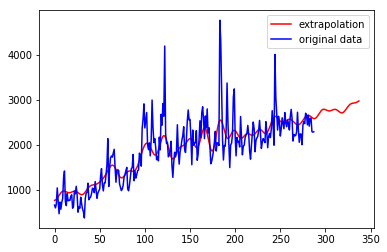

In [6]:
data = np.array([669, 602, 684, 1035, 739, 451, 706, 542, 688, 771, 1226, 1370, 682, 591, 854, 690, \
                 691, 687, 776, 802, 499, 536, 871, 801, 965, 768, 381, 497, 458, 699, 549, 427, 358, \
                 219, 635, 756, 775, 969, 598, 630, 649, 722, 835, 812, 724, 966, 778, 584, 697, 737, \
                 777, 1059, 1218, 848, 713, 884, 879, 1056, 1273, 1848, 780, 1206, 1404, 1444, 1412, \
                 1493, 1576, 1178, 836, 1087, 1101, 1082, 775, 698, 620, 651, 731, 906, 958, 1039, 1105, \
                 620, 576, 707, 888, 1052, 1072, 1357, 768, 986, 816, 889, 973, 983, 1351, 1266, 1053, \
                 1879, 2085, 2419, 1880, 2045, 2212, 1491, 1378, 1524, 1231, 1577, 2459, 1848, 1506, \
                 1589, 1386, 1111, 1180, 1075, 1595, 1309, 2092, 1846, 2321, 2036, 3587, 1637, 1416, \
                 1432, 1110, 1135, 1233, 1439, 894, 628, 967, 1176, 1069, 1193, 1771, 1199, 888, 1155, \
                 1254, 1403, 1502, 1692, 1187, 1110, 1382, 1808, 2039, 1810, 1819, 1408, 803, 1568, 1227, \
                 1270, 1268, 1535, 873, 1006, 1328, 1733, 1352, 1906, 2029, 1734, 1314, 1810, 1540, 1958, \
                 1420, 1530, 1126, 721, 771, 874, 997, 1186, 1415, 973, 1146, 1147, 1079, 3854, 3407, 2257, \
                 1200, 734, 1051, 1030, 1370, 2422, 1531, 1062, 530, 1030, 1061, 1249, 2080, 2251, 1190, \
                 756, 1161, 1053, 1063, 932, 1604, 1130, 744, 930, 948, 1107, 1161, 1194, 1366, 1155, 785, \
                 602, 903, 1142, 1410, 1256, 742, 985, 1037, 1067, 1196, 1412, 1127, 779, 911, 989, 946, \
                 888, 1349, 1124, 761, 994, 1068, 971, 1157, 1558, 1223, 782, 2790, 1835, 1444, 1098, 1399, \
                 1255, 950, 1110, 1345, 1224, 1092, 1446, 1210, 1122, 1259, 1181, 1035, 1325, 1481, 1278, \
                 769, 911, 876, 877, 950, 1383, 980, 705, 888, 877, 638, 1065, 1142, 1090, 1316, 1270, 1048, \
                 1256, 1009, 1175, 1176, 870, 856, 860])
#print(np.arange(data.size))
data += 5*np.arange(data.size)  # add linear trend to the data


##### parameters #####

n_predictions = 50
n_harmonics = 10
de_trend = True
# de_trend = False

######################

extrapolation = fourierExtrapolation(data, n_predictions, n_harmonics, de_trend)

plt.figure(0)
plt.plot(np.arange(0, extrapolation.size), extrapolation, 'r', label = 'extrapolation')
plt.plot(np.arange(0, data.size), data, 'b', label = 'original data', linewidth = 1.5)
plt.legend()
plt.show()

**Questions: **
1. Please explain the effect of setting the de-trending option to either **True** or **False**
1. What is the maxium number of harmonics that one can take?
1. What is a good number of harmonics to take, and why?

**Your answers: **  
1. "De-trending" the data takes out the linearly increasing (or decreasing) part of the data. Without taking this out, we have only periodic functions to work with, and we can't properly reproduce the overall increasing trend in the data
2. The maximum is 144, half the number of data points.  Then the extrapolation perfectly fits every data point
3.  Depends.  If you need to reproduce all of the spikes in the data, you need many harmonics.  If these spikes are just noise or error in the measurement that you aren't interested in, then you don't need as many

**Question: **
Explain how the Fourier Transform is being used to construct the extrapolation. In particular, if the data is a set of obervations $x_0 =f (t_0)\;, \ldots,\; x_n = f(t_n)$, how does one calculate the estimated (extrapolated) values 

$$\tilde{x}_0, \ldots, \tilde{x}_{n}, \tilde{x}_{n+1}, \ldots, \tilde{x}_{n+k}$$

**Your answer: **

---
### 2. Temperature Forecast Using the FFT

We will now apply the **fourierExtrapolation** function to the NOAA temperature data. Again, let's use **noaa_scraper.py** file to get the temperature data.

In [7]:
%matplotlib inline 
import matplotlib.pyplot as plt

from noaa_scraper import get_noaa_temperatures

FloatProgress(value=0.0)

FOUND  http://www1.ncdc.noaa.gov/pub/data/uscrn/products/subhourly01/2007/CRNS0101-05-2007-MI_Gaylord_9_SSW.txt
file exists... ./data/CRNS0101-05-2007-MI_Gaylord_9_SSW.txt
FOUND  http://www1.ncdc.noaa.gov/pub/data/uscrn/products/subhourly01/2008/CRNS0101-05-2008-MI_Gaylord_9_SSW.txt
file exists... ./data/CRNS0101-05-2008-MI_Gaylord_9_SSW.txt
FOUND  http://www1.ncdc.noaa.gov/pub/data/uscrn/products/subhourly01/2009/CRNS0101-05-2009-MI_Gaylord_9_SSW.txt
file exists... ./data/CRNS0101-05-2009-MI_Gaylord_9_SSW.txt
FOUND  http://www1.ncdc.noaa.gov/pub/data/uscrn/products/subhourly01/2010/CRNS0101-05-2010-MI_Gaylord_9_SSW.txt
file exists... ./data/CRNS0101-05-2010-MI_Gaylord_9_SSW.txt
FOUND  http://www1.ncdc.noaa.gov/pub/data/uscrn/products/subhourly01/2011/CRNS0101-05-2011-MI_Gaylord_9_SSW.txt
file exists... ./data/CRNS0101-05-2011-MI_Gaylord_9_SSW.txt
FOUND  http://www1.ncdc.noaa.gov/pub/data/uscrn/products/subhourly01/2012/CRNS0101-05-2012-MI_Gaylord_9_SSW.txt
file exists... ./data/CRNS01

FloatProgress(value=0.0, max=12.0)

reading... ./data/CRNS0101-05-2007-MI_Gaylord_9_SSW.txt
reading... ./data/CRNS0101-05-2008-MI_Gaylord_9_SSW.txt
reading... ./data/CRNS0101-05-2009-MI_Gaylord_9_SSW.txt
reading... ./data/CRNS0101-05-2010-MI_Gaylord_9_SSW.txt
reading... ./data/CRNS0101-05-2011-MI_Gaylord_9_SSW.txt
reading... ./data/CRNS0101-05-2012-MI_Gaylord_9_SSW.txt
reading... ./data/CRNS0101-05-2013-MI_Gaylord_9_SSW.txt
reading... ./data/CRNS0101-05-2014-MI_Gaylord_9_SSW.txt
reading... ./data/CRNS0101-05-2015-MI_Gaylord_9_SSW.txt
reading... ./data/CRNS0101-05-2016-MI_Gaylord_9_SSW.txt
reading... ./data/CRNS0101-05-2017-MI_Gaylord_9_SSW.txt
reading... ./data/CRNS0101-05-2018-MI_Gaylord_9_SSW.txt


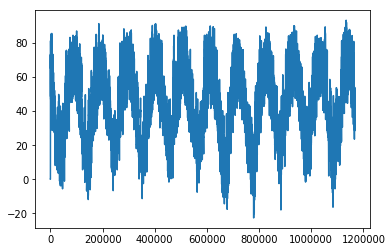

In [9]:
air_temperatures = get_noaa_temperatures('http://www1.ncdc.noaa.gov/pub/data/uscrn/products/subhourly01/', 'Gaylord', 100)
plt.plot(air_temperatures)

**fourierExtrapolation** the air_temperature

FloatProgress(value=0.0, max=21.0)

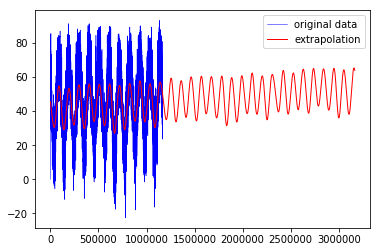

In [10]:

########## parameters ##########

n_predictions = 2000000   # add value
n_harmonics = 10     # add value
de_trend =  True       # add value

################################

data = np.asarray(air_temperatures)

extrapolation = fourierExtrapolation(data, n_predictions, n_harmonics, de_trend)

plt.figure(2)
plt.plot(np.arange(0, data.size), data, 'b', label = 'original data', linewidth = 0.5)
plt.plot(np.arange(0, extrapolation.size), extrapolation, 'r', label = 'extrapolation', linewidth = 1)

plt.legend()
plt.show()

**Questions: **
1. Is linear de-trending necessary and why?
1. Choose a reasonable number of harmonics and predict the temperature at 12pm today.
1. Explain why you choose the number of harmonics.

** Your answers: **
1. No. there is no overall increasing and decreasing trend
2-3. We have 10 years of data, or about 4000 days. If we capture the daily fluctuations in temperature. We must include as many harmonics.  

---
### 3. 2D FFT on image processing

Let's play with 2D FFT for image processing. Use the code you wrote in the pre-class assignment to read the image file "lenna.gif", take 2D FFT of the image, and shift the resulting array  such that the origin in the k space is at the center.   Plot the original image and its log10 of amplitude.

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  import sys


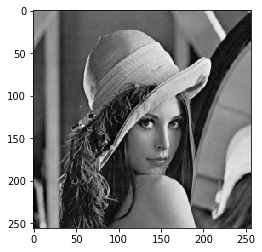

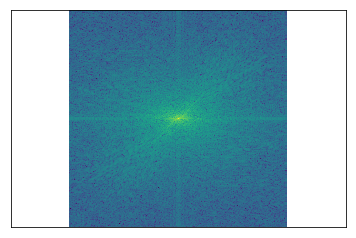

In [102]:
# Your code:

from scipy.misc import imread
import matplotlib.pyplot as plt
import matplotlib.colors as colors

imarray = imread("lenna.gif")
imarray_grey = np.zeros((imarray.shape[0], imarray.shape[1]))
imarray_grey = 0.2125*imarray[:,:,0] + 0.7154*imarray[:,:,1] + 0.0721*imarray[:,:,2]

fig = plt.imshow(imarray_grey, cmap='gray')
plt.show()
PyFs = np.fft.fft2(imarray_grey)
PyFs_shift = np.fft.fftshift(PyFs)

x = np.arange(imarray.shape[0])
y = np.arange(imarray.shape[1])
fig = plt.pcolormesh(x,y,abs(PyFs_shift),norm=colors.LogNorm())
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.axis('equal')
#plt.colorbar(fig)
plt.show()

In the first case, we are going to filter out the high frequency region. Write a code to remove the contribution outside the region, $98 < $ row $<158$ and $98<$ column $<158$.  Inverse Fourier transformation the filters spectrum back to image. 

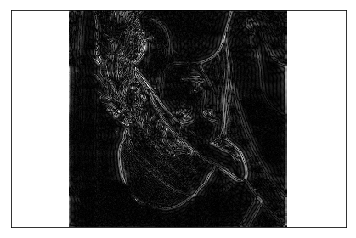

In [98]:
# Your code:
#psd2D.shape

PyFs2 = PyFs_shift
PyFs2[99:158, 99:158]=0+0j

image = np.fft.ifft2(PyFs2)
#image = np.fft.fftshift(image)
fig = plt.pcolormesh(abs(image), cmap='gray')
plt.axis('equal')
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.show()

In the second case, we are going to filter out the low frequency region. Write a code to remove the contribution inside the region, $31 < $ row $ <226 $ and $31<$ column $<226$.  Inverse Fourier transformation the filters spectrum back to image. 

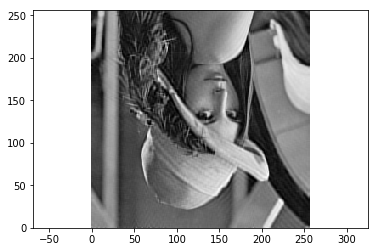

In [103]:
# Your code:
PyFs3 = PyFs
PyFs3[32:226,32:226] = 0+0j

image = np.fft.ifft2(PyFs3)

fig = plt.pcolormesh(abs(image), cmap='gray')
plt.axis('equal')
plt.show()

**Questions: **
1. Describe what is the difference between the result from the lowpass filter and the original image. What happened?
1. For the highpass filter, which part of the image is enhanced and why?

In [104]:
#If we filter out low frequency, then almost everything keeps 
# if we filter out high frequency, then we just can see vague stuffs.

# Edge still can be seen.

### Congratulations, we're done!

** Don't forget to add your names to the top!!**

Log into the course D2L website (d2l.msu.edu) and go to "Assessments > Assignments > In-class Assignment 20181025".